In [11]:
%reset -f


In [12]:
from google.colab import drive
drive.mount('/content/drive')
!pip install rioxarray
!pip install cartopy

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#########
'ArcPy Prep'
#########

import shutil
import os
import arcpy
import pandas as pd
import numpy as np


projDIR = r'C:\Users\afullhart\Documents\ArcGIS\Projects'
saveDIR = r'C:\Users\afullhart\Google Drive\Colab Notebooks\FigureTIFMaps'

gcmLabels = ['CCSM4', 'CanESM2', 'MIROC5']

ndays = [31, 28.25, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
ndaysw = [str(x/365.25) for x in ndays]
arcpy.env.overwriteOutput = True

for gcm in gcmLabels:

  gcmGDB = os.path.join(projDIR, gcm, gcm + '.gdb')
  print(gcmGDB)
  arcpy.env.workspace = gcmGDB

  outputCoordinateSystem = 'GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'
  parallelProcessingFactor = '5'
  extent = '-121.0 30.0 -102.0 43.0 GEOGCS["GCS_WGS_1984",DATUM["D_WGS_1984",SPHEROID["WGS_1984",6378137.0,298.257223563]],PRIMEM["Greenwich",0.0],UNIT["Degree",0.0174532925199433]]'

  with arcpy.EnvManager(outputCoordinateSystem=outputCoordinateSystem, extent=extent, parallelProcessingFactor=parallelProcessingFactor):

    output_raster = arcpy.sa.RasterCalculator(
      rasters=['accm_1974_2013_1', 'accm_1974_2013_2', 'accm_1974_2013_3', 'accm_1974_2013_4', 'accm_1974_2013_5', 'accm_1974_2013_6', 'accm_1974_2013_7', 'accm_1974_2013_8', 'accm_1974_2013_9', 'accm_1974_2013_10', 'accm_1974_2013_11', 'accm_1974_2013_12', 'accm_2070_2099_1', 'accm_2070_2099_2', 'accm_2070_2099_3', 'accm_2070_2099_4', 'accm_2070_2099_5', 'accm_2070_2099_6', 'accm_2070_2099_7', 'accm_2070_2099_8', 'accm_2070_2099_9', 'accm_2070_2099_10', 'accm_2070_2099_11', 'accm_2070_2099_12'],
      input_names=['accm1', 'accm2', 'accm3', 'accm4', 'accm5', 'accm6', 'accm7', 'accm8', 'accm9', 'accm10', 'accm11', 'accm12', 'accm1f', 'accm2f', 'accm3f', 'accm4f', 'accm5f', 'accm6f', 'accm7f', 'accm8f', 'accm9f', 'accm10f', 'accm11f', 'accm12f'],
      expression='Con(IsNull(accm1), accm1, (accm1f + accm2f + accm3f + accm4f + accm5f + accm6f + accm7f + accm8f + accm9f + accm10f + accm11f + accm12f) - (accm1 + accm2 + accm3 + accm4 + accm5 + accm6 + accm7 + accm8 + accm9 + accm10 + accm11 + accm12))'
    )

  output_raster.save(os.path.join(saveDIR, 'accm_delta_' + gcm + '.tif'))

  with arcpy.EnvManager(outputCoordinateSystem=outputCoordinateSystem, extent=extent, parallelProcessingFactor=parallelProcessingFactor):

    output_raster = arcpy.sa.RasterCalculator(
      rasters=['tmax_1974_2013_1', 'tmax_1974_2013_2', 'tmax_1974_2013_3', 'tmax_1974_2013_4', 'tmax_1974_2013_5', 'tmax_1974_2013_6', 'tmax_1974_2013_7', 'tmax_1974_2013_8', 'tmax_1974_2013_9', 'tmax_1974_2013_10', 'tmax_1974_2013_11', 'tmax_1974_2013_12', 'tmax_2070_2099_1', 'tmax_2070_2099_2', 'tmax_2070_2099_3', 'tmax_2070_2099_4', 'tmax_2070_2099_5', 'tmax_2070_2099_6', 'tmax_2070_2099_7', 'tmax_2070_2099_8', 'tmax_2070_2099_9', 'tmax_2070_2099_10', 'tmax_2070_2099_11', 'tmax_2070_2099_12'],
      input_names=['tmax1', 'tmax2', 'tmax3', 'tmax4', 'tmax5', 'tmax6', 'tmax7', 'tmax8', 'tmax9', 'tmax10', 'tmax11', 'tmax12', 'tmax1f', 'tmax2f', 'tmax3f', 'tmax4f', 'tmax5f', 'tmax6f', 'tmax7f', 'tmax8f', 'tmax9f', 'tmax10f', 'tmax11f', 'tmax12f'],
      expression='Con(IsNull(tmax1), tmax1, (tmax1f*{} + tmax2f*{} + tmax3f*{} + tmax4f*{} + tmax5f*{} + tmax6f*{} + tmax7f*{} + tmax8f*{} + tmax9f*{} + tmax10f*{} + tmax11f*{} + tmax12f*{}) - (tmax1*{} + tmax2*{} + tmax3*{} + tmax4*{} + tmax5*{} + tmax6*{} + tmax7*{} + tmax8*{} + tmax9*{} + tmax10*{} + tmax11*{} + tmax12*{}))'.format(ndaysw[0], ndaysw[1], ndaysw[2], ndaysw[3], ndaysw[4], ndaysw[5], ndaysw[6], ndaysw[7], ndaysw[8], ndaysw[9], ndaysw[10], ndaysw[11], ndaysw[0], ndaysw[1], ndaysw[2], ndaysw[3], ndaysw[4], ndaysw[5], ndaysw[6], ndaysw[7], ndaysw[8], ndaysw[9], ndaysw[10], ndaysw[11])
    )

  output_raster.save(os.path.join(saveDIR, 'tmax_delta_' + gcm + '.tif'))





<ipython-input-13-115d5b7b4230>:48: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cividis_r = mpl.cm.get_cmap(cmap_str)
<ipython-input-13-115d5b7b4230>:140: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  magma = mpl.cm.get_cmap(cmap_str)


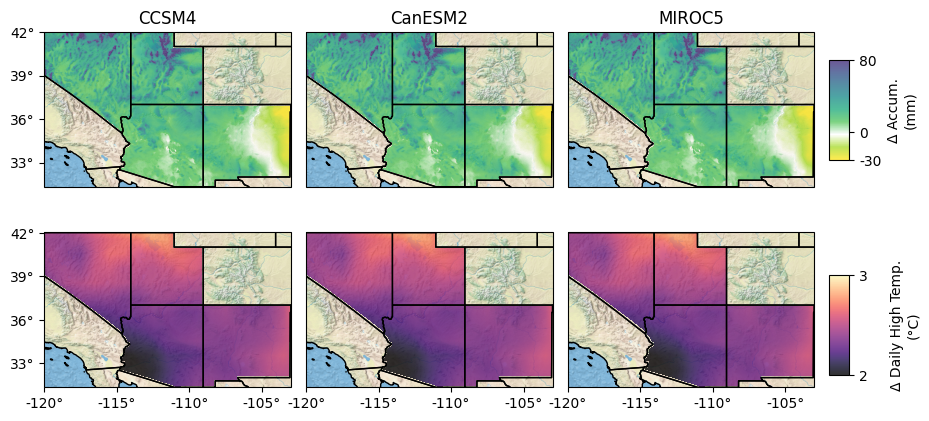

In [13]:
#######
'Requires https://www.naturalearthdata.com/downloads/10m-raster-data/10m-natural-earth-1/'
#######

import pandas as pd
import numpy as np
import scipy
from scipy.spatial import distance
import matplotlib.pylab as pylab
import matplotlib.pyplot as plt
import os
import rioxarray as xr
import cartopy.crs as ccrs
import cartopy
from matplotlib.image import imread
import matplotlib as mpl
import PIL
PIL.Image.MAX_IMAGE_PIXELS = None

accmCCSM4tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/accm_delta_CCSM4.tif'
tmaxCCSM4tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/tmax_delta_CCSM4.tif'

accmCanESM2tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/accm_delta_CanESM2.tif'
tmaxCanESM2tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/tmax_delta_CanESM2.tif'

accmMIROC5tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/accm_delta_MIROC5.tif'
tmaxMIROC5tif = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/tmax_delta_MIROC5.tif'

fname = '/content/drive/My Drive/Colab Notebooks/FigureTIFMaps/NE1_HR_LC_SR_W_DR.tif'


#dem = xr.open_rasterio(accmtif)
#print('The CRS for this data is:', dem.rio.crs)
#print('The spatial extent is:', dem.rio.bounds())
#print('The no data value is:', dem.rio.nodata)

dem = xr.open_rasterio(accmCCSM4tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

fig, ax = plt.subplots(2, 3, figsize=(8, 5), subplot_kw={'projection': ccrs.PlateCarree()})
fig.tight_layout()

cmap_str = 'viridis_r'
cividis_r = mpl.cm.get_cmap(cmap_str)
colors = cividis_r.colors
colors = colors[::32][:2] + [[1.0, 1.0, 1.0]] + colors[::32][2:]
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom_accm', colors)

ax[0, 0].set_title('CCSM4')
#ax[0, 0].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
#ax[0, 0].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[0, 0].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[0, 0].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[0, 0].set_extent([-120, -102.991, 31.333, 42.008])

ax[0, 0].add_feature(cartopy.feature.STATES, linewidth=1)

ax[0, 0].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])

ax[0, 0].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=-30,
           vmax=80,
           alpha=0.80,
           cmap=cmap)

dem = xr.open_rasterio(accmCanESM2tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

ax[0, 1].set_title('CanESM2')
#ax[0, 1].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
#ax[0, 1].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
#ax[0, 1].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
#ax[0, 1].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[0, 1].set_extent([-120, -102.991, 31.333, 42.008])

ax[0, 1].add_feature(cartopy.feature.STATES, linewidth=1)

ax[0, 1].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])

ax[0, 1].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=-30,
           vmax=80,
           alpha=0.80,
           cmap=cmap)

dem = xr.open_rasterio(accmMIROC5tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

ax[0, 2].set_title('MIROC5')
#ax[0, 2].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
#ax[0, 2].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
#ax[0, 2].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
#ax[0, 2].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[0, 2].set_extent([-120, -102.991, 31.333, 42.008])

ax[0, 2].add_feature(cartopy.feature.STATES, linewidth=1)

ax[0, 2].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])

im = ax[0, 2].imshow(dem,
            extent=[lon_min, lon_max, lat_min, lat_max],
            origin='upper',
            vmin=-30,
            vmax=80,
            alpha=0.80,
           cmap=cmap)

cax = fig.add_axes([1.0, 0.6, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im, cax=cax, orientation='vertical', label='Δ Accum.\n(mm)')
cbar.set_ticks([-30, 0, 80])
cbar.set_ticklabels(['-30', '0', '80'])









cmap_str = 'magma'
magma = mpl.cm.get_cmap(cmap_str)
colors = magma.colors
cmap = mpl.colors.LinearSegmentedColormap.from_list('custom_tmax', colors)

dem = xr.open_rasterio(tmaxCCSM4tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

ax[1, 0].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1, 0].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
ax[1, 0].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
ax[1, 0].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[1, 0].set_extent([-120, -102.991, 31.333, 42.008])

ax[1, 0].add_feature(cartopy.feature.STATES, linewidth=1)

ax[1, 0].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])

ax[1, 0].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=2,
           vmax=3,
           alpha=0.80,
           cmap=cmap)

dem = xr.open_rasterio(tmaxCanESM2tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

ax[1, 1].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1, 1].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
#ax[1, 1].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
#ax[1, 1].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[1, 1].set_extent([-120, -102.991, 31.333, 42.008])

ax[1, 1].add_feature(cartopy.feature.STATES, linewidth=1)

ax[1, 1].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])

ax[1, 1].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=2,
           vmax=3,
           alpha=0.80,
           cmap=cmap)

dem = xr.open_rasterio(tmaxMIROC5tif)
lon_min = dem.rio.bounds()[0]
lat_min = dem.rio.bounds()[1]
lon_max = dem.rio.bounds()[2]
lat_max = dem.rio.bounds()[3]
dem = dem[0].where(dem[0] > -1e9, np.nan)

ax[1, 2].set_xticks([-105, -110, -115, -119.99], crs=ccrs.PlateCarree())
ax[1, 2].set_xticklabels(['-105°', '-110°', '-115°', '-120°'])
#ax[1, 2].set_yticks([33, 36, 39, 42], crs=ccrs.PlateCarree())
#ax[1, 2].set_yticklabels(['33°', '36°', '39°', '42°'])
ax[1, 2].set_extent([-120, -102.991, 31.333, 42.008])

ax[1, 2].add_feature(cartopy.feature.STATES, linewidth=1)

ax[1, 2].imshow(imread(fname), origin='upper', transform=ccrs.PlateCarree(),
          extent=[-180, 180, -90, 90])

im2 = ax[1, 2].imshow(dem,
           extent=[lon_min, lon_max, lat_min, lat_max],
           origin='upper',
           vmin=2,
           vmax=3,
           alpha=0.80,
           cmap=cmap)

cax = fig.add_axes([1.0, 0.17, 0.025, 0.2]) #[X, Y, WIDTH, HEIGHT]
cbar = fig.colorbar(im2, cax=cax, orientation='vertical', label='\nΔ Daily High Temp.\n(°C)')
cbar.set_ticks([2, 3])
cbar.set_ticklabels(['2', '3'])




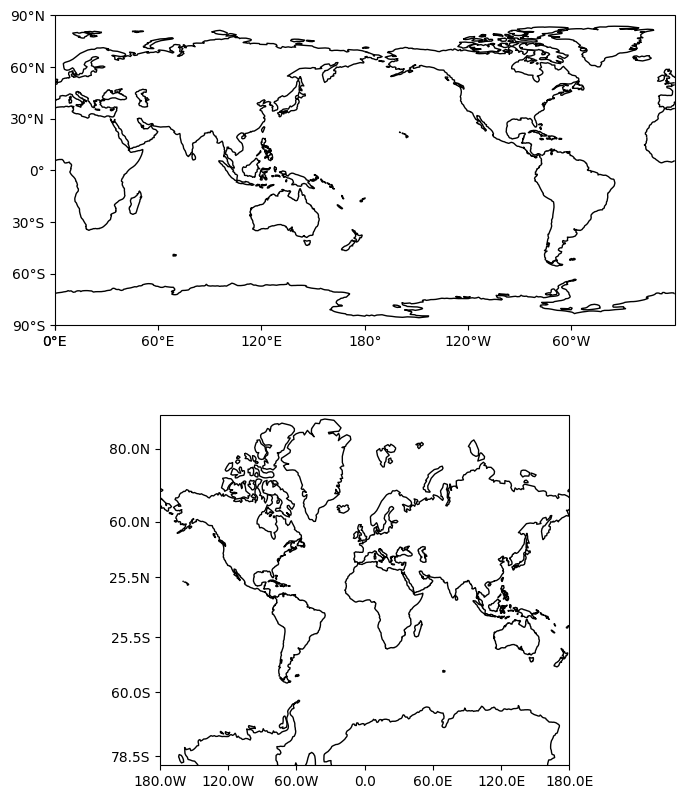

In [ ]:
import matplotlib.pyplot as plt

import cartopy.crs as ccrs
from cartopy.mpl.ticker import LatitudeFormatter, LongitudeFormatter


def main():
    fig = plt.figure(figsize=(8, 10))

    # Label axes of a Plate Carree projection with a central longitude of 180:
    ax1 = fig.add_subplot(2, 1, 1,
                          projection=ccrs.PlateCarree(central_longitude=180))
    ax1.set_global()
    ax1.coastlines()
    ax1.set_xticks([0, 60, 120, 180, 240, 300, 360], crs=ccrs.PlateCarree())
    ax1.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax1.xaxis.set_major_formatter(lon_formatter)
    ax1.yaxis.set_major_formatter(lat_formatter)

    # Label axes of a Mercator projection without degree symbols in the labels
    # and formatting labels to include 1 decimal place:
    ax2 = fig.add_subplot(2, 1, 2, projection=ccrs.Mercator())
    ax2.set_global()
    ax2.coastlines()
    ax2.set_xticks([-180, -120, -60, 0, 60, 120, 180], crs=ccrs.PlateCarree())
    ax2.set_yticks([-78.5, -60, -25.5, 25.5, 60, 80], crs=ccrs.PlateCarree())
    lon_formatter = LongitudeFormatter(number_format='.1f',
                                       degree_symbol='',
                                       dateline_direction_label=True)
    lat_formatter = LatitudeFormatter(number_format='.1f',
                                      degree_symbol='')
    ax2.xaxis.set_major_formatter(lon_formatter)
    ax2.yaxis.set_major_formatter(lat_formatter)

    plt.show()


if __name__ == '__main__':
    main()

